### To start:
- Place the cursor within the cell below.
- Change `2018_01` (YYYY_MM) to run a different year and month. (Only 2017-2018 data are currently avialable)
- Press "Run" button above to run the cell. 
![run button](./images/run_button.png)   

### Once the "Figure 1" bar is displayed, you can now use the graphical interface. 
![interaction_bar](./images/interaction_bar.png)
- Select another longitude by moving the "Long" slider or pressing left- (<) and right-arrow (>) associated with it.  
- Select time and date within YYYY_MM by moving the "Date" slider or pressing left- (<) and right-arrow (>) associated with it.
- See the [Jet Stream Characterization](https://github.com/neaptide/jsviz/blob/master/jsalgo.md) description for "Local Maxima Detection" parameters and further peak limitation.
  - Press "Jet Stream ON/OFF" button to toggle display of jet stream markers.
  - Press "Limitation ON/OFF" button to enable/disable further limitation of jet stream algorithm.
- See the [README](https://github.com/neaptide/jsviz/blob/master/README.md) for documentation and how to activate this demo.

<IPython.core.display.Javascript object>


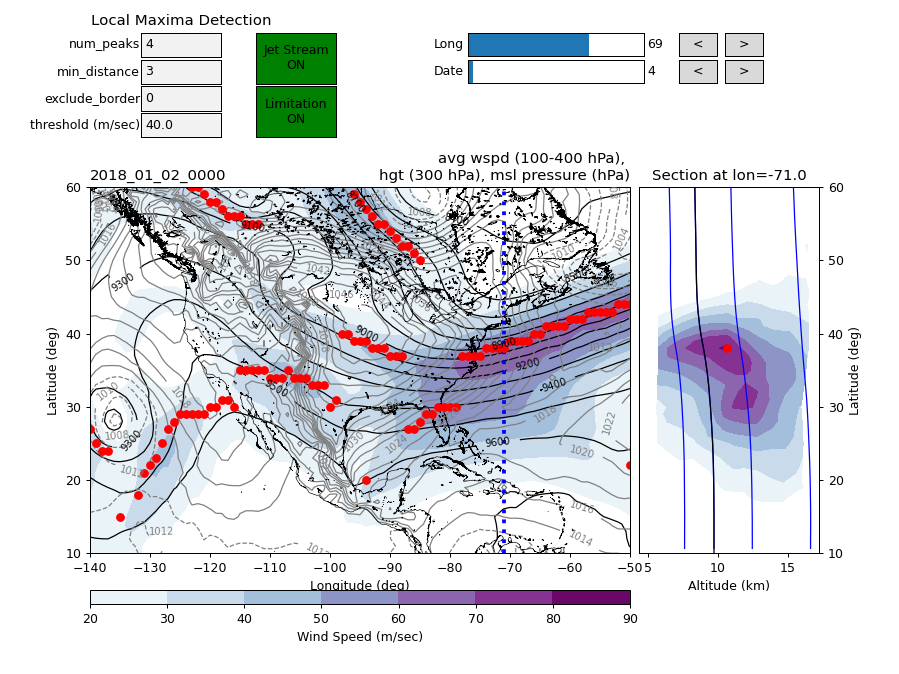

Reading ERA5 data from: http://whewell.marine.unc.edu/dods/era5
['longitude', 'latitude', 'level', 'time', 'z']
['longitude', 'latitude', 'level', 'time', 'u']
['longitude', 'latitude', 'level', 'time', 'v']
['longitude', 'latitude', 'time', 'msl']


In [1]:
%matplotlib notebook
%run jsviz.py 2018_01